In [5]:
# standard Python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [109]:
import os

directory = "/Users/marieriddle/Desktop/PHY312/Josephson/data/"
print("Files in directory:", os.listdir(directory))


Files in directory: ['wide_sweep.csv', 'sample40.csv', 'mid_sweep.csv', 'sample38.csv', 'right_knee.csv', 'left_knee.csv', 'osc1.csv', 'osc3.csv', 'osc2.csv', 'narrow_sweep.csv', 'sample38_final.csv', 'nonRF_2.csv', 'nonRF_1.csv', 'osc4.csv', 'sample_40final.csv']


## DC Josephson IV

/var/folders/sb/jfsvqf1n6q123hsfxrmln4940000gn/T/ipykernel_48594/3476500567.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


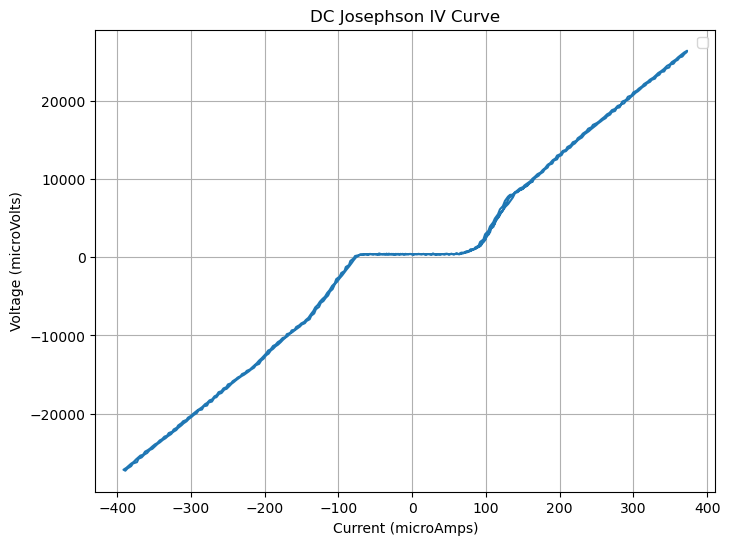

In [111]:
df = pd.read_csv('/Users/marieriddle/Desktop/PHY312/Josephson/data/wide_sweep.csv')#read file

current = df.iloc[:, 0]  # first column 
voltage = df.iloc[:, 1]/10000 *10**6   # second column, note that the data is off by a factor of 10,000
#so the voltage in the data needs to be divided by 10,000 to be correct in volts, divided by 1000 for microvolts


plt.figure(figsize=(8, 6))
plt.plot(current, voltage,markersize=1)
plt.xlabel("Current (microAmps)")
plt.ylabel("Voltage (microVolts)")
plt.title("DC Josephson IV Curve")
plt.legend()
plt.grid(True)

plt.show()



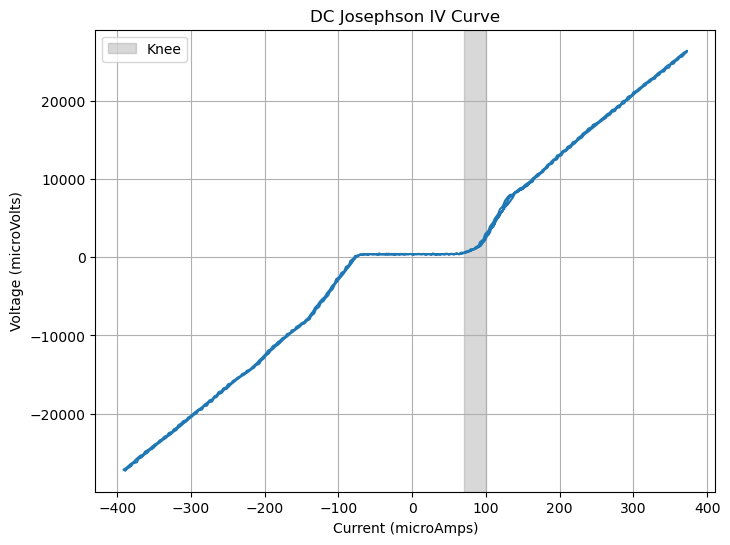

In [113]:
plt.figure(figsize=(8, 6))
plt.plot(current, voltage,markersize=1)
plt.axvspan(70, 100, color='gray', alpha=0.3, label="Knee")

plt.xlabel("Current (microAmps)")
plt.ylabel("Voltage (microVolts)")
plt.title("DC Josephson IV Curve")
plt.legend()
plt.grid(True)

plt.show()

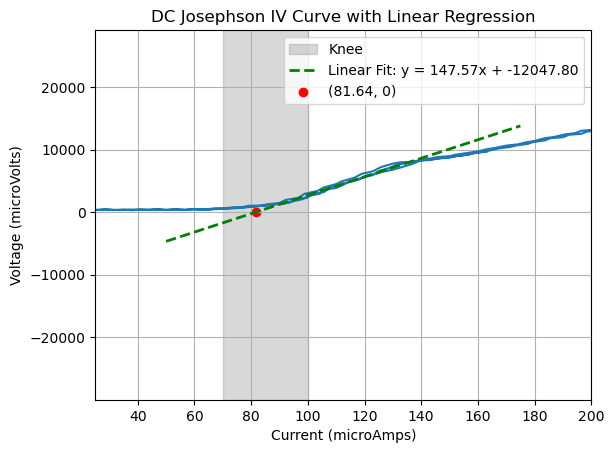

In [115]:
sect = (current >= 90) & (current <= 140)  
current_section = current[sect]
voltage_section = voltage[sect]

# linear regression 
coeffs = np.polyfit(current_section, voltage_section, deg=1) 
m, b = coeffs  

current_reg = np.linspace(50,175, 100)
voltage_reg = m * current_reg + b

plt.plot(current, voltage, markersize=1)
plt.axvspan(70, 100, color='gray', alpha=0.3, label="Knee")
#plt.plot(current_section, voltage_section, 'ro', label="Data Section (Fitted)")  
plt.plot(current_reg, voltage_reg, 'g--', linewidth=2, label=f"Linear Fit: y = {m:.2f}x + {b:.2f}")  
x = 81.64
y = 0

# Create plot
plt.scatter(x, y, color='red', label=f'({x}, {y})')
plt.title("DC Josephson IV Curve with Linear Regression")
plt.xlabel("Current (microAmps)")
plt.xlim(25, 200)
plt.ylabel("Voltage (microVolts)")
plt.legend()
plt.grid(True)
plt.show()



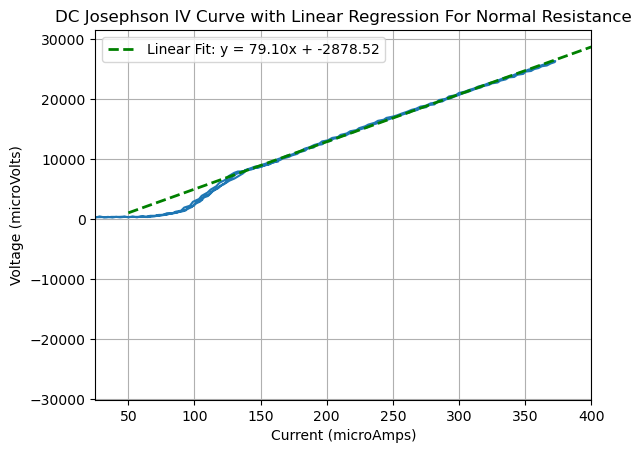

In [121]:
sect = (current >= 150) & (current <= 350)  
current_section = current[sect]
voltage_section = voltage[sect]

# linear regression 
coeffs = np.polyfit(current_section, voltage_section, deg=1) 
m, b = coeffs  

current_reg = np.linspace(50,400, 100)
voltage_reg = m * current_reg + b

plt.plot(current, voltage, markersize=1)

plt.plot(current_reg, voltage_reg, 'g--', linewidth=2, label=f"Linear Fit: y = {m:.2f}x + {b:.2f}")  

plt.title("DC Josephson IV Curve with Linear Regression For Normal Resistance")
plt.xlabel("Current (microAmps)")
plt.xlim(25, 400)
plt.ylabel("Voltage (microVolts)")
plt.legend()
plt.grid(True)
plt.show()


## DC Josephson Flux

/var/folders/sb/jfsvqf1n6q123hsfxrmln4940000gn/T/ipykernel_51481/3093267754.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


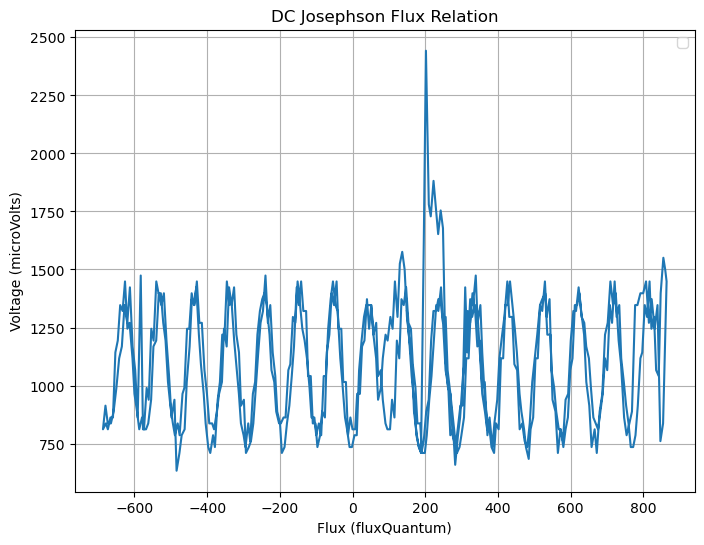

In [13]:
dfflux = pd.read_csv('/Users/marieriddle/Desktop/PHY312/Josephson/data/osc3.csv')#read file

flux = dfflux.iloc[:, 0]  # first column 
voltageflux = dfflux.iloc[:, 1]/10000 *10**6   # second column, note that the data is off by a factor of 10,000
#so the voltage in the data needs to be divided by 10,000 to be correct in volts, divided by 1000 for microvolts


plt.figure(figsize=(8, 6))
plt.plot(flux, voltageflux,markersize=1)
plt.xlabel("Flux (fluxQuantum)")
plt.ylabel("Voltage (microVolts)")
plt.title("DC Josephson Flux Relation")
plt.legend()
plt.grid(True)

plt.show()



## AC Josephson Effect

/var/folders/sb/jfsvqf1n6q123hsfxrmln4940000gn/T/ipykernel_51481/1519497044.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


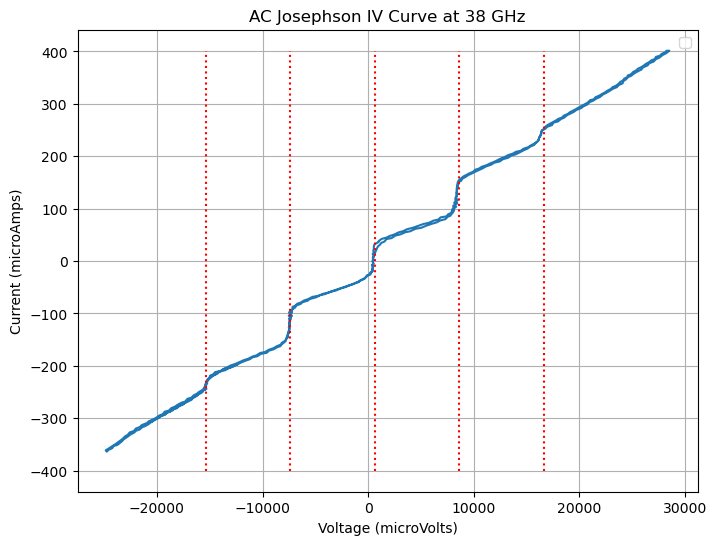

In [81]:
df38 = pd.read_csv('/Users/marieriddle/Desktop/PHY312/Josephson/data/sample38_final.csv')#read file

c38 = df38.iloc[:, 0]  # first column 
voltage38 = df38.iloc[:, 1]/10000 *10**6   # second column, note that the data is off by a factor of 10,000
#so the voltage in the data needs to be divided by 10,000 to be correct in volts, divided by 1000 for microvolts

start=-15400;
change=8000;
plt.figure(figsize=(8, 6))
plt.plot(voltage38, c38, markersize=1)
plt.vlines(x=[start,start+change,start+2*change,start+3*change,start+4*change], ymin=-400, ymax=400, colors='r', linestyles='dotted')
#the shapiro steps appear to be about 8000 microVolts apart 
plt.ylabel("Current (microAmps)")
plt.xlabel("Voltage (microVolts)")
plt.title("AC Josephson IV Curve at 38 GHz")
plt.legend()
plt.grid(True)

plt.show()

/var/folders/sb/jfsvqf1n6q123hsfxrmln4940000gn/T/ipykernel_51481/2030456661.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


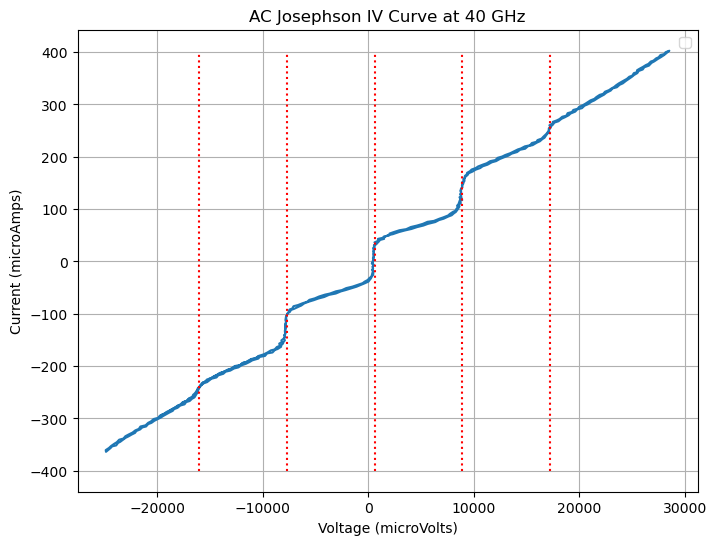

In [89]:
df40 = pd.read_csv('/Users/marieriddle/Desktop/PHY312/Josephson/data/sample_40final.csv')#read file

c40 = df40.iloc[:, 0]  # first column 
voltage40 = df40.iloc[:, 1]/10000 *10**6   # second column, note that the data is off by a factor of 10,000
#so the voltage in the data needs to be divided by 10,000 to be correct in volts, divided by 1000 for microvolts

start=-16000;
change=8300;
plt.figure(figsize=(8, 6))
plt.plot(voltage40, c40, markersize=1)
plt.vlines(x=[start,start+change,start+2*change,start+3*change,start+4*change], ymin=-400, ymax=400, colors='r', linestyles='dotted')
#the shapiro steps appear to be about 8300 microVolts apart 
plt.ylabel("Current (microAmps)")
plt.xlabel("Voltage (microVolts)")
plt.title("AC Josephson IV Curve at 40 GHz")
plt.legend()
plt.grid(True)

plt.show()

In [98]:
#determining the magnetic flux quantum using our two data points
x1, y1 = 2*np.pi *38*10**9, 80*10**-6
x2, y2 = 2*np.pi *40*10**9, 83*10**-6
slope=(y2 - y1) / (x2 - x1)
print("magnetic flux quantum is ",str(slope))

magnetic flux quantum is  2.3873241463784307e-16
